<a href="https://colab.research.google.com/github/pkrodev/AI_Tutorial/blob/main/2/MINST%2C_rozpoznawanie_cyfr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)

(X_train, y_train), (X_test, y_test) = load_data()

In [23]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [24]:
X_train=X_train/255.
X_test=X_test/255.

In [ ]:
print(X_train[0])

In [26]:
print(y_train[0])

5


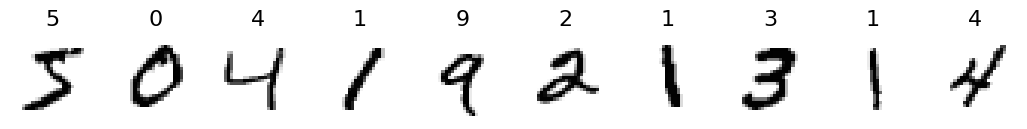

In [27]:
plt.figure(figsize=(13,13))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

In [28]:
y_train = to_categorical(y_train, num_classes=10)

In [34]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy', #musi tak być w klasyfikacji wieloklasowej
              metrics=['accuracy'])


model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2391 - accuracy: 0.9282
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1581 - accuracy: 0.9560
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1474 - accuracy: 0.9602
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1314 - accuracy: 0.9656
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1251 - accuracy: 0.9673


In [38]:
print(model.predict(X_test))

313/313 [==============================] - 1s 2ms/step
[[0.             0.000000003457 0.000000055467 ... 0.99999994     0.             0.            ]
 [0.             0.000000007251 0.99999994     ... 0.             0.             0.            ]
 [0.             0.99996966     0.000000861875 ... 0.000028956707 0.000000030333 0.            ]
 ...
 [0.             0.             0.             ... 0.             0.             0.            ]
 [0.             0.             0.             ... 0.000000000068 0.000000004804 0.            ]
 [0.             0.             0.000000000009 ... 0.             0.             0.            ]]


In [40]:
np.set_printoptions(threshold=np.inf)


print(model.predict(X_test)[:10])

313/313 [==============================] - 1s 2ms/step
[[0.             0.000000003457 0.000000055467 0.00000000127  0.000000000002 0.000000000016 0.
  0.99999994     0.             0.            ]
 [0.             0.000000007251 0.99999994     0.             0.             0.             0.
  0.             0.             0.            ]
 [0.             0.99996966     0.000000861875 0.000000000109 0.000000484869 0.             0.
  0.000028956707 0.000000030333 0.            ]
 [0.9999991      0.000000000087 0.000000625809 0.00000000019  0.000000021459 0.000000026513 0.000000000716
  0.000000087111 0.000000077095 0.000000098488]
 [0.             0.             0.             0.000000009942 0.99999994     0.000000000556 0.000000000001
  0.000000002922 0.             0.000000007047]
 [0.             0.9999992      0.000000000744 0.000000000005 0.000000208945 0.             0.
  0.000000436029 0.000000009933 0.            ]
 [0.             0.             0.             0.000000000008 0

In [41]:
print(y_test[:10])

[7 2 1 0 4 1 4 9 5 9]


In [47]:
predictions=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [48]:
y_pred=np.argmax(predictions,axis=1)

In [49]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [54]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified

,y_test,y_pred
18,3,8
124,7,4
151,9,8
193,9,8
219,5,3
...,...,...
9941,5,6
9944,3,9
9975,3,2
9982,5,6


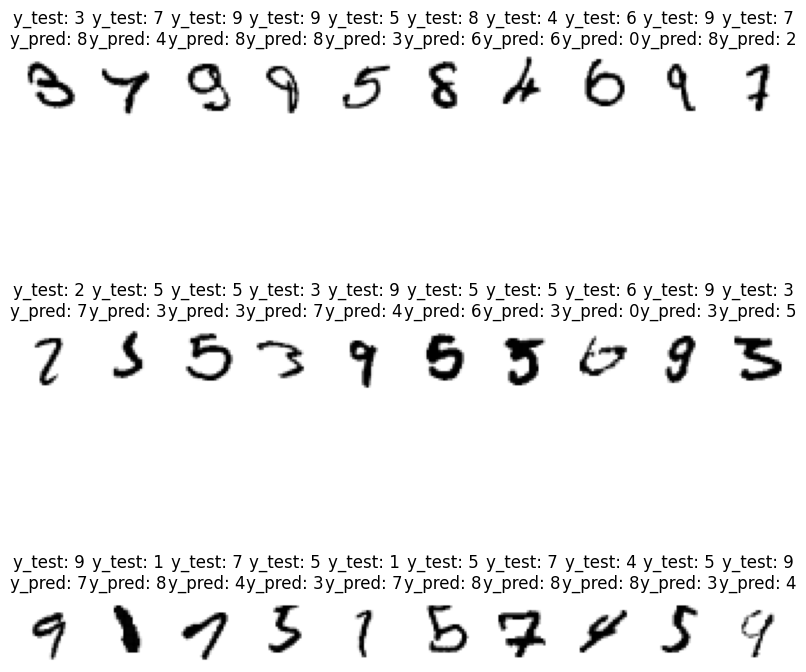

In [60]:
plt.figure(figsize=(10, 10))
for i, j in zip(range(1, 31), misclassified.index[:30]):
    plt.subplot(3, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(y_pred[j]), color='black', fontsize=12)
plt.show()